In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [100]:
df_tennis=pd.read_csv('../data/prepared_data.csv')
df_tennis.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,winner_hand,winner_ht,winner_age,loser_id,loser_name,loser_hand,loser_ht,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,loser_rank
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,Taylor Fritz,R,193.0,25.1,126610,Matteo Berrettini,R,196.0,26.7,7-6(4) 7-6(6),3,F,135.0,15.0,2.0,85.0,52.0,45.0,16.0,12.0,0.0,0.0,7.0,2.0,97.0,62.0,47.0,15.0,12.0,9.0,9.0,9.0,16.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,Frances Tiafoe,R,188.0,24.9,207518,Lorenzo Musetti,R,185.0,20.8,6-2 0-0 RET,3,F,34.0,3.0,1.0,27.0,19.0,15.0,3.0,4.0,3.0,3.0,0.0,0.0,21.0,12.0,8.0,3.0,4.0,1.0,3.0,19.0,23.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,Taylor Fritz,R,193.0,25.1,128034,Hubert Hurkacz,R,196.0,25.8,7-6(5) 7-6(5),3,SF,104.0,11.0,0.0,80.0,50.0,44.0,19.0,12.0,4.0,4.0,17.0,1.0,82.0,62.0,51.0,7.0,12.0,2.0,2.0,9.0,10.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,Frances Tiafoe,R,188.0,24.9,200390,Kacper Zuk,R,183.0,23.9,6-3 6-3,3,SF,79.0,5.0,4.0,61.0,37.0,31.0,11.0,9.0,5.0,5.0,3.0,3.0,68.0,41.0,26.0,12.0,9.0,6.0,9.0,19.0,245.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,Stefanos Tsitsipas,R,193.0,24.3,126610,Matteo Berrettini,R,196.0,26.7,4-6 7-6(2) 6-4,3,SF,155.0,9.0,1.0,98.0,52.0,43.0,28.0,16.0,1.0,2.0,7.0,2.0,89.0,58.0,48.0,18.0,16.0,1.0,2.0,4.0,16.0


<h2> Let's create some features based on match stasticts </h2>

In [101]:
df_tennis['w_ace_per_match']=df_tennis['w_ace']/df_tennis['w_svpt']  #percentage of aces per match
df_tennis['w_df_per_match']=df_tennis['w_df']/df_tennis['w_svpt']    #percentage of double faults per match
df_tennis['w_1stIn_per_match']=df_tennis['w_1stIn']/df_tennis['w_svpt'] #percentage of first serves in per match
df_tennis['w_1stWon_per_match']=df_tennis['w_1stWon']/df_tennis['w_1stIn'] #percentage of first serve points won per match


#loser
df_tennis['l_ace_per_match']=df_tennis['l_ace']/df_tennis['l_svpt']  #percentage of aces per match
df_tennis['l_df_per_match']=df_tennis['l_df']/df_tennis['l_svpt']    #percentage of double faults per match
df_tennis['l_1stIn_per_match']=df_tennis['l_1stIn']/df_tennis['l_svpt'] #percentage of first serves in per match
df_tennis['l_1stWon_per_match']=df_tennis['l_1stWon']/df_tennis['l_1stIn'] #percentage of first serve points won per match




In [102]:
#lets drop the original columns and some others that are not needed
columns_to_drop=['w_ace','w_df','w_1stIn','w_1stWon','w_bpSaved','w_bpFaced',
                'l_ace','l_df','l_1stIn','l_1stWon','l_bpSaved','l_bpFaced','tourney_id','draw_size', 'winner_id',
                'w_svpt', 'l_svpt', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms']

df_tennis.drop(columns_to_drop,axis=1,inplace=True)

In [103]:
#checking columns again
df_tennis.columns

Index(['tourney_name', 'surface', 'tourney_level', 'tourney_date', 'match_num',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_age', 'loser_id',
       'loser_name', 'loser_hand', 'loser_ht', 'loser_age', 'score', 'best_of',
       'round', 'minutes', 'winner_rank', 'loser_rank', 'w_ace_per_match',
       'w_df_per_match', 'w_1stIn_per_match', 'w_1stWon_per_match',
       'l_ace_per_match', 'l_df_per_match', 'l_1stIn_per_match',
       'l_1stWon_per_match'],
      dtype='object')

<h2> Let's create rank and players difference feature </h2>

In [104]:
df_tennis['rank_diff']=df_tennis['winner_rank']-df_tennis['loser_rank'] #difference in ranks
df_tennis['ht_diff']=df_tennis['winner_ht']-df_tennis['loser_ht'] #difference in height
df_tennis['age_diff']=df_tennis['winner_age']-df_tennis['loser_age'] #difference in age

#dropping the original columns
columns_to_drop=['winner_rank','loser_rank','winner_ht','loser_ht','winner_age','loser_age']
df_tennis.drop(columns_to_drop,axis=1,inplace=True)

In [105]:
#checking columns again
df_tennis.columns

Index(['tourney_name', 'surface', 'tourney_level', 'tourney_date', 'match_num',
       'winner_name', 'winner_hand', 'loser_id', 'loser_name', 'loser_hand',
       'score', 'best_of', 'round', 'minutes', 'w_ace_per_match',
       'w_df_per_match', 'w_1stIn_per_match', 'w_1stWon_per_match',
       'l_ace_per_match', 'l_df_per_match', 'l_1stIn_per_match',
       'l_1stWon_per_match', 'rank_diff', 'ht_diff', 'age_diff'],
      dtype='object')

In [106]:
columns_to_drop=['loser_id','score', 'minutes']
df_tennis.drop(columns_to_drop,axis=1,inplace=True)

<h2> Let's extract information from the tourney_date column </h2>

<p>We are going to convert this column to show only month </h2>

In [107]:
df_tennis['tourney_date']=pd.to_datetime(df_tennis['tourney_date'],format='%Y%m%d')
df_tennis['month']=df_tennis['tourney_date'].dt.strftime('%B') #extracting month from the date



In [111]:
df_tennis.drop('tourney_date',axis=1,inplace=True)
pd.set_option('display.max_columns', None)
df_tennis.head()

,tourney_name,surface,tourney_level,match_num,winner_name,winner_hand,loser_name,loser_hand,best_of,round,w_ace_per_match,w_df_per_match,w_1stIn_per_match,w_1stWon_per_match,l_ace_per_match,l_df_per_match,l_1stIn_per_match,l_1stWon_per_match,rank_diff,ht_diff,age_diff,month
0,United Cup,Hard,A,300,Taylor Fritz,R,Matteo Berrettini,R,3,F,0.176471,0.023529,0.611765,0.865385,0.072165,0.020619,0.639175,0.758065,-7.0,-3.0,-1.6,January
1,United Cup,Hard,A,299,Frances Tiafoe,R,Lorenzo Musetti,R,3,F,0.111111,0.037037,0.703704,0.789474,0.000000,0.000000,0.571429,0.666667,-4.0,3.0,4.1,January
2,United Cup,Hard,A,296,Taylor Fritz,R,Hubert Hurkacz,R,3,SF,0.137500,0.000000,0.625000,0.880000,0.207317,0.012195,0.756098,0.822581,-1.0,-3.0,-0.7,January
3,United Cup,Hard,A,295,Frances Tiafoe,R,Kacper Zuk,R,3,SF,0.081967,0.065574,0.606557,0.837838,0.044118,0.044118,0.602941,0.634146,-226.0,5.0,1.0,January
4,United Cup,Hard,A,292,Stefanos Tsitsipas,R,Matteo Berrettini,R,3,SF,0.091837,0.010204,0.530612,0.826923,0.078652,0.022472,0.651685,0.827586,-12.0,-3.0,-2.4,January


In [113]:
#let's check for null values after feature engineering
df_tennis.isna().sum()

tourney_name           0
surface                0
tourney_level          0
match_num              0
winner_name            0
winner_hand            0
loser_name             0
loser_hand             0
best_of                0
round                  0
w_ace_per_match       19
w_df_per_match        19
w_1stIn_per_match     19
w_1stWon_per_match    19
l_ace_per_match       19
l_df_per_match        19
l_1stIn_per_match     19
l_1stWon_per_match    19
rank_diff              0
ht_diff                0
age_diff               0
month                  0
dtype: int64

<h2> Let's impute the null values </h2>

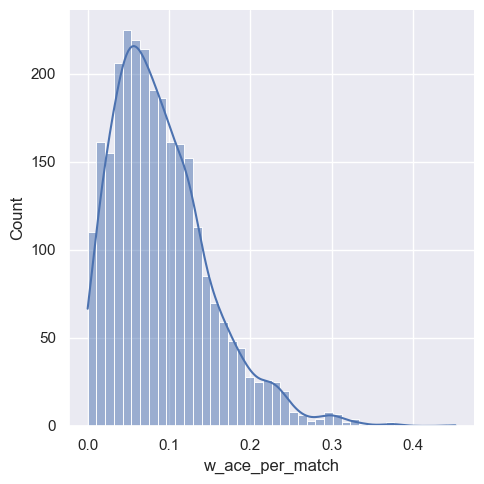

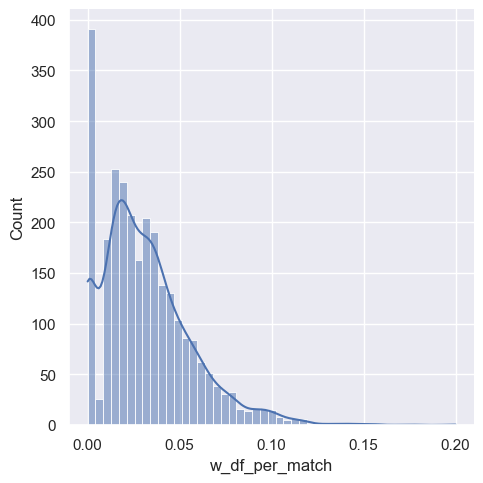

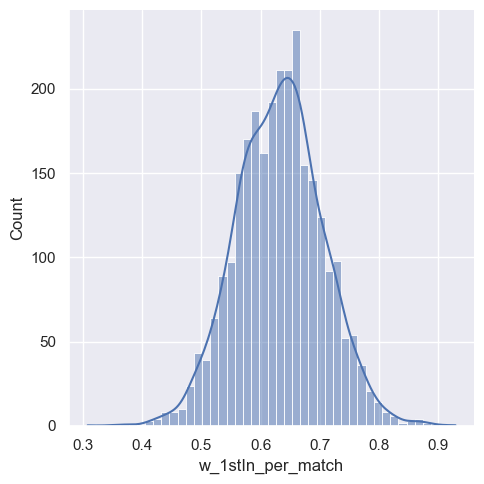

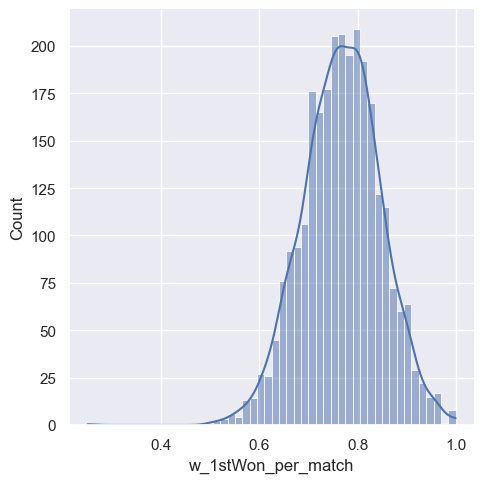

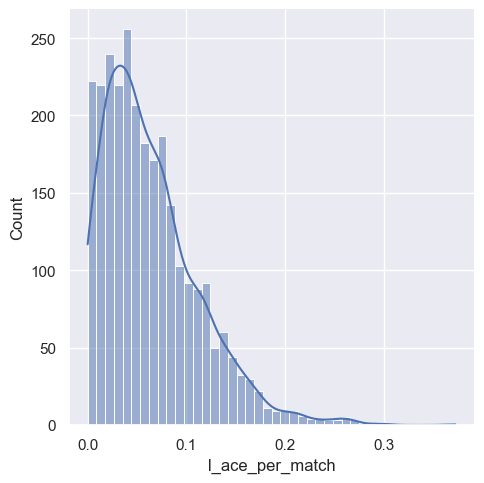

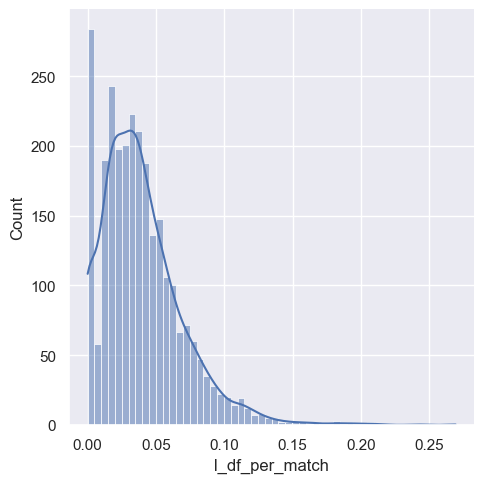

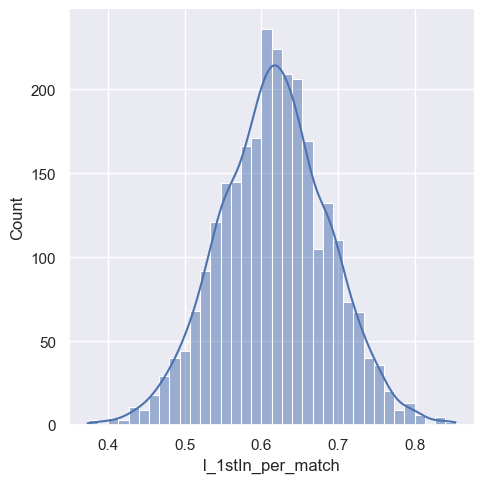

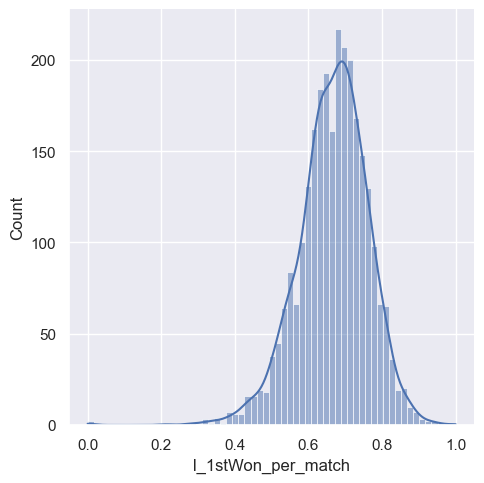

In [116]:
sns.displot(df_tennis['w_ace_per_match'],kde=True)
sns.displot(df_tennis['w_df_per_match'],kde=True)
sns.displot(df_tennis['w_1stIn_per_match'],kde=True)
sns.displot(df_tennis['w_1stWon_per_match'],kde=True)
sns.displot(df_tennis['l_ace_per_match'],kde=True)
sns.displot(df_tennis['l_df_per_match'],kde=True)
sns.displot(df_tennis['l_1stIn_per_match'],kde=True)
sns.displot(df_tennis['l_1stWon_per_match'],kde=True)

In [117]:
#imputing missing values with median values 
df_tennis['w_ace_per_match'].fillna(df_tennis['w_ace_per_match'].median(),inplace=True)
df_tennis['w_df_per_match'].fillna(df_tennis['w_df_per_match'].median(),inplace=True)
df_tennis['l_ace_per_match'].fillna(df_tennis['l_ace_per_match'].median(),inplace=True)
df_tennis['l_df_per_match'].fillna(df_tennis['l_df_per_match'].median(),inplace=True)

#imputing missing values with mean values
df_tennis['w_1stIn_per_match'].fillna(df_tennis['w_1stIn_per_match'].mean(),inplace=True)
df_tennis['w_1stWon_per_match'].fillna(df_tennis['w_1stWon_per_match'].mean(),inplace=True)
df_tennis['l_1stIn_per_match'].fillna(df_tennis['l_1stIn_per_match'].mean(),inplace=True)
df_tennis['l_1stWon_per_match'].fillna(df_tennis['l_1stWon_per_match'].mean(),inplace=True)

In [118]:
#checking for null values again
df_tennis.isna().sum()

tourney_name          0
surface               0
tourney_level         0
match_num             0
winner_name           0
winner_hand           0
loser_name            0
loser_hand            0
best_of               0
round                 0
w_ace_per_match       0
w_df_per_match        0
w_1stIn_per_match     0
w_1stWon_per_match    0
l_ace_per_match       0
l_df_per_match        0
l_1stIn_per_match     0
l_1stWon_per_match    0
rank_diff             0
ht_diff               0
age_diff              0
month                 0
dtype: int64

In [120]:
#Let's define our target variable. 1 if player1 won else 0


<p> Good shape now for our model </p>

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [52]:
columns_to_drop=['tourney_id', 'tourney_name', 'winner_id', 'loser_id', 'score', 'tourney_date']
df_tennis.drop(columns_to_drop, axis=1, inplace=True)

In [54]:
X=df_tennis.drop('winner_name', axis=1)
y=df_tennis['winner_name']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

<h2>Let's create a pipeline </h2>

In [61]:
#preprocessing
numeric_features=X.select_dtypes(include=['int64', 'float64']).columns
categorical_features=X.select_dtypes(include=['object']).columns

numeric_transformer=Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) #handle_unknown='ignore' to avoid errors when new categories are found in the test set
])

preprocessor=ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train_transformed=preprocessor.fit_transform(X_train)

In [57]:
from sklearn.neural_network import MLPClassifier    
from sklearn.metrics import accuracy_score

In [62]:
nn_model=MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

pipeline=Pipeline([
    ('preprocessor', preprocessor),
    ('model', nn_model)
])

pipeline.fit(X_train, y_train)

y_pred=pipeline.predict(X_test)

accuracy=accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.6381818181818182


In [65]:
X_test.columns

Index(['surface', 'draw_size', 'tourney_level', 'match_num', 'winner_hand',
       'winner_ht', 'winner_age', 'loser_name', 'loser_hand', 'loser_ht',
       'loser_age', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt',
       'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
       'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced', 'winner_rank', 'loser_rank'],
      dtype='object')

In [73]:




data = {'winner_name': ['Novak Djokovic'], 'loser_name': ['Carlos Alcaraz'], 'surface': ['Hard']}
novak_vs_alcaraz = pd.DataFrame(data)

X_predict_subset=preprocessor.transform(novak_vs_alcaraz)

predictions=pipeline.predict(X_predict_subset)

print(f'Predictions: {predictions}')



KeyError: "None of [Index(['draw_size', 'match_num', 'winner_ht', 'winner_age', 'loser_ht',\n       'loser_age', 'best_of', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn',\n       'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace',\n       'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',\n       'l_bpSaved', 'l_bpFaced', 'winner_rank', 'loser_rank'],\n      dtype='object')] are in the [columns]"